### Data preparation

In [17]:
print("Hello world")

Hello world


In [18]:
import os

base_dir = "./corn"
os.listdir(base_dir)

['1', '.ipynb_checkpoints', '2', '3']

In [19]:
dir_1 = os.path.join(base_dir, str(1))
dir_2 = os.path.join(base_dir, str(2))
dir_3 = os.path.join(base_dir, str(3))

print(dir_1, dir_2, dir_3)

./corn/1 ./corn/2 ./corn/3


In [20]:
from PIL import Image

SIZE = 224
clss = []
imgs = []

def read_files(source):
  cls = source.split('/')[-1]
  filenames = os.listdir(source)
  for name in filenames:
    curr_path = os.path.join(source, name)
    curr_img = Image.open(curr_path)
    curr_img = curr_img.resize((SIZE, SIZE))
    curr_img = curr_img.convert('L')
    clss.append(cls)
    imgs.append(curr_img)


In [21]:
read_files(dir_1)

In [22]:
clss[:10]

['1', '1', '1', '1', '1', '1', '1', '1', '1', '1']

In [23]:
imgs[:3]

[<PIL.Image.Image image mode=L size=224x224 at 0x7FD8CCABC8E0>,
 <PIL.Image.Image image mode=L size=224x224 at 0x7FD8CCABCEB0>,
 <PIL.Image.Image image mode=L size=224x224 at 0x7FD8CCABCBB0>]

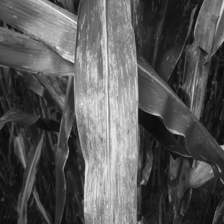

In [24]:
imgs[0]

In [25]:
read_files(dir_2)
read_files(dir_3)

In [26]:
print(len(imgs))
print(len(clss))

66
66


In [27]:
import numpy as np

np_imgs = []

for img in imgs:
  np_imgs.append(np.array(img))

In [28]:
len(np_imgs)

66

In [29]:
np_imgs[0]

array([[ 77,  78,  84, ...,  91, 126, 174],
       [ 82,  78,  75, ...,  97, 136, 190],
       [ 89,  90,  86, ..., 107, 150, 204],
       ...,
       [ 20,  17,  15, ...,  31,  29,  53],
       [ 19,  17,  15, ...,  32,  29,  36],
       [ 16,  17,  15, ...,  33,  29,  31]], dtype=uint8)

In [30]:
np_imgs[0].shape

(224, 224)

In [46]:
np_imgs = np.array(np_imgs)

In [48]:
np_imgs.shape

(66, 224, 224)

In [49]:
np_imgs[0].shape

(224, 224)

In [57]:
flatten_imgs = np.reshape(np_imgs, (66, -1))

In [58]:
flatten_imgs.shape

(66, 50176)

In [59]:
import pandas as pd

df_imgs = pd.DataFrame(flatten_imgs)
df_imgs.head()

,0,1,2,3,4,5,6,7,8,9,...,50166,50167,50168,50169,50170,50171,50172,50173,50174,50175
0,77,78,84,90,94,97,96,92,94,95,...,53,44,32,29,34,38,33,33,29,31
1,42,36,33,50,50,42,41,47,49,46,...,138,164,147,140,152,154,153,150,150,149
2,34,31,28,28,31,31,31,31,31,32,...,127,126,124,121,118,116,111,108,104,97
3,64,66,56,61,83,97,88,62,51,45,...,119,120,119,126,138,147,153,149,139,128
4,112,103,82,47,24,66,70,55,60,59,...,112,124,118,96,72,68,71,76,72,69


In [64]:
mean_img = df_imgs.mean()
mean_img.shape

(50176,)

In [65]:
mean_img

0        103.000000
1         99.287879
2         97.393939
3        100.893939
4        104.939394
            ...    
50171    113.560606
50172    115.136364
50173    113.303030
50174    112.409091
50175    112.000000
Length: 50176, dtype: float64

In [71]:
mean_array = np.array(mean_img.tolist(), dtype=np.uint8)
mean_array

array([103,  99,  97, ..., 113, 112, 112], dtype=uint8)

In [74]:
mean_img = Image.fromarray(mean_array.reshape(224, 224))

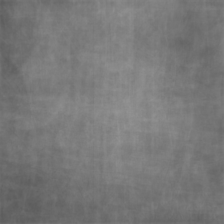

In [75]:
mean_img

In [76]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_imgs)

StandardScaler()

In [83]:
scaller_mean_img = scaler.mean_.astype('uint8')
scaller_mean_img

array([103,  99,  97, ..., 113, 112, 112], dtype=uint8)

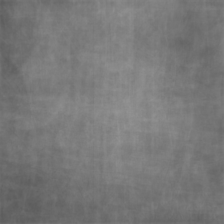

In [84]:
mean_img = Image.fromarray(scaller_mean_img.reshape(224, 224))
mean_img

In [90]:
scaled_imgs = scaler.transform(df_imgs)
scaled_imgs

array([[-0.39253152, -0.34685859, -0.21533314, ..., -1.18283547,
        -1.21326431, -1.1576047 ],
       [-0.92093933, -1.03119455, -1.03525548, ...,  0.54053349,
         0.54679541,  0.52878239],
       [-1.04171825, -1.11266312, -1.11564002, ..., -0.07811178,
        -0.1223182 , -0.21437124],
       ...,
       [-0.81525776, -0.46091459, -0.05456405, ..., -1.07972793,
        -1.12598862, -1.14331329],
       [ 0.37743415,  0.66335163,  0.86181974, ...,  1.92512053,
         1.91411454,  1.88646692],
       [ 0.13587629,  0.23971508,  0.34735866, ...,  1.02661192,
         1.43409825,  1.72926135]])

In [92]:
scaled_df_imgs = pd.DataFrame(scaled_imgs)
scaled_df_imgs

,0,1,2,3,4,5,6,7,8,9,...,50166,50167,50168,50169,50170,50171,50172,50173,50174,50175
0,-0.392532,-0.346859,-0.215333,-0.173286,-0.166923,-0.153269,-0.175037,-0.207832,-0.174956,-0.178137,...,-0.969341,-1.075347,-1.246200,-1.262033,-1.190368,-1.189400,-1.246139,-1.182835,-1.213264,-1.157605
1,-0.920939,-1.031195,-1.035255,-0.809554,-0.838312,-0.961941,-0.988588,-0.880963,-0.874311,-0.929239,...,0.402160,0.782583,0.531075,0.463868,0.645755,0.636557,0.574451,0.540533,0.546795,0.528782
2,-1.041718,-1.112663,-1.115640,-1.159501,-1.128230,-1.123676,-1.136507,-1.120299,-1.154053,-1.143839,...,0.224672,0.194238,0.175620,0.168444,0.116703,0.038399,-0.062755,-0.078112,-0.122318,-0.214371
3,-0.588797,-0.542383,-0.665487,-0.634580,-0.334770,-0.153269,-0.293372,-0.656586,-0.843229,-0.944567,...,0.095589,0.101342,0.098347,0.246187,0.427910,0.526370,0.574451,0.525804,0.386790,0.228663
4,0.135876,0.060484,-0.247487,-0.857274,-1.235042,-0.609066,-0.559625,-0.761296,-0.703358,-0.729967,...,-0.017358,0.163273,0.082893,-0.220273,-0.599074,-0.717170,-0.669619,-0.549461,-0.587789,-0.614531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,-0.301947,-0.216509,-0.215333,-0.300540,-0.334770,-0.344410,-0.396915,-0.447168,-0.532404,-0.607338,...,0.369890,0.271652,0.221984,0.246187,0.241186,0.243032,0.286191,0.407967,0.444974,0.428742
62,-0.694479,-0.689027,-0.665487,-0.730020,-0.823053,-0.859019,-0.855462,-0.821130,-0.827688,-0.898581,...,-0.937070,-1.013416,-1.029836,-1.122095,-1.205928,-1.315328,-1.367512,-1.389051,-1.387816,-1.357685
63,-0.815258,-0.460915,-0.054564,-0.030126,-0.243217,-0.491441,-0.633584,-0.462126,-0.314827,-0.193466,...,-0.807988,-0.610865,-0.488926,-0.391308,-0.412350,-0.591242,-0.912364,-1.079728,-1.125989,-1.143313
64,0.377434,0.663352,0.861820,0.956088,0.992750,1.037685,1.126646,1.258098,1.394707,1.416038,...,2.015691,1.974754,2.030169,2.096477,2.077309,2.053247,1.955066,1.925121,1.914115,1.886467


### PCA